## IMPORT PACKAGES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import os
import tweepy
from tweepy import OAuthHandler
import requests
import json 
import re 
import time 
pd.set_option('display.max_columns',None)
pd.options.display.float_format = '${:,.2f}'.format

## GATHERING DATA 

In [2]:
# Gathering Twitter_Archive_Dataset
df1 = pd.read_csv('twitter-archive-enhanced.csv')


In [3]:
# Gathering the Image Predictions File from a url online
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name =url.split("/")[-1]
response = requests.get(url)

with open(file_name, 'wb') as file:
    file.write(response.content)    
df2 = pd.read_table(file_name, sep='\t')

In [4]:
# Gathering Api Data
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
tweet_ids = df1.tweet_id.values
len(tweet_ids)


2356

In [6]:
'''
count = 0
fails_dict = {}
start = time.time()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = time.time()
print(end - start)
print(fails_dict)
'''

'\ncount = 0\nfails_dict = {}\nstart = time.time()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = time.time()\nprint(end - start)\nprint(fails_dict)\n'

In [7]:
with open('tweet_json.txt') as file:
    favs = []
    retweets=[]
    tweet_id=[]
    for line in file:
        retweets.append(json.loads(line)["retweet_count"])
        favs.append(json.loads(line)["favorite_count"])
        tweet_id.append(json.loads(line)["id"])
     
        
        
       

In [8]:
df3=pd.DataFrame({"id":tweet_id,"retweets_count":retweets,"favorite_count":favs})

## Assessing Data

In [9]:
#Assessing Twitter_Archive_Dataset
df1.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,$nan,$nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,$nan,$nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,$nan,$nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,$nan,$nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,$nan,$nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,$nan,$nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,$nan,$nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,$nan,$nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,$nan,$nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,$nan,$nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,$nan,$nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,$nan,$nan,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,$nan,$nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,$nan,$nan,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,$nan,$nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,$nan,$nan,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,$nan,$nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,$nan,$nan,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,$nan,$nan,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,$nan,$nan,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df1["rating_denominator"].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [13]:
df1["rating_numerator"].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [14]:
sum(df1["tweet_id"].duplicated())

0

In [15]:
df1["source"].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [16]:
df1["name"].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
             ... 
Dobby           1
Meera           1
Jo              1
Chesterson      1
Chuq            1
Name: name, Length: 957, dtype: int64

In [17]:
df1["retweeted_status_id"].unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

In [18]:
df1.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [19]:
sum(df1.duplicated())

0

In [20]:
##Assessing Image_Prediction_Dataset
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,$0.47,True,collie,$0.16,True,Shetland_sheepdog,$0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,$0.51,True,miniature_pinscher,$0.07,True,Rhodesian_ridgeback,$0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,$0.60,True,malinois,$0.14,True,bloodhound,$0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,$0.41,True,redbone,$0.36,True,miniature_pinscher,$0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,$0.56,True,Rottweiler,$0.24,True,Doberman,$0.15,True


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
sum(df2.duplicated())

0

In [23]:
sum(df2["tweet_id"].duplicated())

0

In [24]:
sum((df2.loc[:,lambda df :["tweet_id","jpg_url"]]).duplicated())

0

In [25]:
sum((df2.loc[:,lambda df :["jpg_url","p1","p2","p3"]]).duplicated())

66

In [26]:
list(df2[df2["jpg_url"].duplicated(keep="first")].index)==list(df2[(df2.loc[:,lambda df :["jpg_url","p1","p2","p3"]]).duplicated()].index)

    
   

True

In [27]:
df2.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [28]:
df2.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [29]:
df2.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [30]:
df2.p1_dog.unique()

array([ True, False])

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
df2.p2_dog.unique()

array([ True, False])

In [33]:
df2.p3_dog.unique()

array([ True, False])

In [34]:
for i in df2.p2_conf:
    if i > 1:
        print(i)
   
    

In [35]:
for i in df2.p1_conf:
    if i > 1:
        print(i)

In [36]:
for i in df2.p3_conf:
    if i > 1:
        print(i)


In [37]:
df2[df2.tweet_id==892420643555336193]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,$0.10,False,bagel,$0.09,False,banana,$0.08,False


In [38]:
##Assesing Api_Data
df3.head()

,id,retweets_count,favorite_count
0,892420643555336193,7425,35194
1,892177421306343426,5522,30461
2,891815181378084864,3645,22905
3,891689557279858688,7601,38482
4,891327558926688256,8185,36751


In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweets_count  2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [40]:
sum(df3["id"].duplicated())

0

In [41]:
sum(df3.duplicated())

0

# Assessment ISSUES

<h2> Twitter_Archive_dataset </h2>

<h3> Quality </h3>
<ul>
<li>We only wan tweets" that have images in Image Predictions dataset .  </li>
<li>We only want original ratings no retweets nor replies  </li>
<li>There are columns that won't be used for analysis.  </li>
<li>Consistency issue nan is written sometime as None or $nan. </li>
<li>Weird values in name column like ('this', 'unacceptable','all',"such") .</li>
<li>Timestamp column data_type is string (object) instead of DataTime.</li>
<li>Some denominators values are  > or < than 10 or =0.  </li>
<li>Some numerators values seem outliers.</li>
<li>Missing data in multiple columns.  </li>
</ul>

<h3> Tidiness </h3>
<uL>
 <li> The dog stage has 4 stages (values in headers).</li>
</ul>

<h2> Image Predictions </h2>
<uL>
  <li> Undescriptive columns names (p1,p2,p2,p1_conf,p2_conf,p3_conf,P1_dof,p2_dog,p3_dog).</li>
  <li> Duplicates.</li>
  <li> There are columns that won't be used for analysis.</li>
 
</ul>
<h3> Tidiness </h3>
<ul>
  <li>There is 3 columns for classifications algos and another three for algos confidentiality (values in headers).</li>
</ul>

#### for merging the3 data sets ,df3.id  columns should be changed to "twitter_id"

# Cleaning


<h2> Clean Data_archive_enhanced </h2>

### copy orignal data frames 

In [42]:
df1_cleaned=df1.copy().sort_values('tweet_id')
df2_cleaned=df2.copy().sort_values('tweet_id')
df3_cleaned=df3.copy().sort_values('id')

### clean the twitter archive dataset


### Define 
<ul>
<li>getting  tweets with images only. 
</ul>
<h3>code </h3>

tweets_with_image = list(df2_cleaned.tweet_id.unique())
len(tweets_with_image) == df1_cleaned.tweet_id.isin(tweets_with_image).sum()
df1_cleaned=df1_cleaned[df1_cleaned.tweet_id.isin(tweets_with_image)]

<h3>Test</h3>

In [43]:
df1_cleaned.shape

(2356, 17)

### Define 
<ul>
<li>remove replies and retweets.
</ul>
<h3>Code </h3>

In [44]:
#no replies or retweets
df1_cleaned=df1_cleaned[pd.isnull(df1_cleaned.retweeted_status_id)]
df1_cleaned=df1_cleaned[pd.isnull(df1_cleaned.in_reply_to_status_id)]

<h3> Test</h3>

In [45]:
df1_cleaned.shape

(2097, 17)

### Define 
<ul>
<li>drop unimportatnt columns for analysis.
</ul>
<h3>Code </h3>

In [46]:
df1_cleaned.drop(["in_reply_to_user_id","in_reply_to_status_id","retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp","source","expanded_urls"],axis=1,inplace=True)

<h3>Test </h3>

In [47]:
df1_cleaned.shape

(2097, 10)

### Define 
<ul>
<li>remove inconsistency replace None with np.nan
</ul>
<h3>Code </h3>

In [48]:
#replace None with nan
df1_cleaned=df1_cleaned.loc[:,:].replace('None',np.nan)

<h3>Test</h3>

In [49]:
df1_cleaned.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,8,10,NaN,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9,10,a,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN,NaN,NaN,NaN
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN,NaN,NaN,NaN


In [50]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2355 to 0
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   text                2097 non-null   object
 3   rating_numerator    2097 non-null   int64 
 4   rating_denominator  2097 non-null   int64 
 5   name                1494 non-null   object
 6   doggo               83 non-null     object
 7   floofer             10 non-null     object
 8   pupper              230 non-null    object
 9   puppo               24 non-null     object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


### Define 
<ul>
<li>remove weird dog names liks a,an,this,all.
</ul>
<h3>Code </h3>

In [51]:
#clean names
unvalid_names=[]
#(df1_cleaned[df1_cleaned['name'].str.len() < 3])
for index,row in df1_cleaned.iterrows(): 
    if type(row["name"])==str and len(row["name"])<=3 and row["name"][0].islower():
        unvalid_names.append(row["name"])
     
        
         
print(unvalid_names)       
df1_cleaned.loc[df1_cleaned["name"].isin(unvalid_names), "name"] = np.nan                                                         

['a', 'a', 'a', 'a', 'an', 'a', 'a', 'the', 'the', 'an', 'a', 'an', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'the', 'a', 'an', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'the', 'a', 'a', 'a', 'a', 'one', 'a', 'a', 'a', 'a', 'a', 'the', 'the', 'a', 'a', 'by', 'the', 'the', 'a', 'a', 'a', 'an', 'a', 'a', 'a', 'a', 'old', 'a', 'all', 'mad', 'a', 'an', 'a', 'a', 'a', 'one', 'his', 'not', 'one', 'my', 'a', 'a', 'one', 'not', 'a']


<h3>Test</h3>

In [52]:
df1_cleaned[df1_cleaned['name']=="a"].sum().any()


False

### Define 
<ul>
<li>investigating if there are more weird names and remove them if exist  .
</ul>
<h3>Code </h3>

In [53]:
df1_cleaned.name.unique()

array([nan, 'quite', 'Walter', 'Scout', 'Kreggory', 'Jimothy',
       'Christoper', 'Lugan', 'Josep', 'Jockson', 'Jeph', 'Carll',
       'Klevin', 'Keet', 'Dave', 'Clybe', 'Gabe', 'Pipsy', 'Bradlay',
       'Churlie', 'Kenneth', 'Clarence', 'Timison', 'Joshwa', 'Genevieve',
       'Fwed', 'Biden', 'Cupcake', 'Reese', 'Philippe', 'Hall', 'Dook',
       'Naphaniel', 'Frank', 'Kial', 'George', 'Olive', 'Calvin', 'Filup',
       'Shaggy', 'Tedrick', 'Stu', 'Erik', 'Cleopatricia', 'Otis',
       'Jiminy', 'Alfie', 'Skittles', 'Ron', 'Torque', 'Bisquick',
       'Jareld', 'Sophie', 'Rusty', 'DayZ', 'Jo', 'Gòrdón', 'Spark',
       'Marvin', 'Kallie', 'Jomathan', 'Maks', 'Timofy', 'Zeek', 'Hanz',
       'Winifred', 'Kevon', 'Banditt', 'Bobb', 'Amélie', 'Ruffles',
       'Lambeau', 'Herald', 'Jaycob', 'Jeremy', 'Chaz', 'Ruby', 'Bernie',
       'Harrison', 'Terrance', 'Tucker', 'Samsom', 'Jaspers', 'Clarq',
       'Ralf', 'Kirk', 'Sully', 'Dug', 'Saydee', 'Chip', 'Oliviér',
       'Billl', 'Rond

In [54]:
extra_invalid_names=[]
for index,row in df1_cleaned.iterrows(): 
    if type(row["name"])==str and row["name"][0].islower():
        print(row["name"])
        extra_invalid_names.append(row["name"])

quite
space
just
light
life
officially
actually
just
getting
very
infuriating
unacceptable
this
very
getting
just
actually
very
very
incredibly
quite
quite
such


In [55]:
df1_cleaned.loc[df1_cleaned["name"].isin(extra_invalid_names), "name"] = np.nan    

<h3>Test</h3>

In [56]:
df1_cleaned.name.unique()

array([nan, 'Walter', 'Scout', 'Kreggory', 'Jimothy', 'Christoper',
       'Lugan', 'Josep', 'Jockson', 'Jeph', 'Carll', 'Klevin', 'Keet',
       'Dave', 'Clybe', 'Gabe', 'Pipsy', 'Bradlay', 'Churlie', 'Kenneth',
       'Clarence', 'Timison', 'Joshwa', 'Genevieve', 'Fwed', 'Biden',
       'Cupcake', 'Reese', 'Philippe', 'Hall', 'Dook', 'Naphaniel',
       'Frank', 'Kial', 'George', 'Olive', 'Calvin', 'Filup', 'Shaggy',
       'Tedrick', 'Stu', 'Erik', 'Cleopatricia', 'Otis', 'Jiminy',
       'Alfie', 'Skittles', 'Ron', 'Torque', 'Bisquick', 'Jareld',
       'Sophie', 'Rusty', 'DayZ', 'Jo', 'Gòrdón', 'Spark', 'Marvin',
       'Kallie', 'Jomathan', 'Maks', 'Timofy', 'Zeek', 'Hanz', 'Winifred',
       'Kevon', 'Banditt', 'Bobb', 'Amélie', 'Ruffles', 'Lambeau',
       'Herald', 'Jaycob', 'Jeremy', 'Chaz', 'Ruby', 'Bernie', 'Harrison',
       'Terrance', 'Tucker', 'Samsom', 'Jaspers', 'Clarq', 'Ralf', 'Kirk',
       'Sully', 'Dug', 'Saydee', 'Chip', 'Oliviér', 'Billl', 'Ronduh',
       'Kol

In [57]:
df1_cleaned.name.isnull().sum()

707

In [58]:
df1_cleaned.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,8,10,NaN,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,7,10,NaN,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN,NaN,NaN,NaN
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN,NaN,NaN,NaN


### Define 
<ul>
<li>clean tidiness issue of 4 dog stages.
</ul>
<h3>Code </h3>

In [59]:
df1_cleaned["floofer"].unique()

array([nan, 'floofer'], dtype=object)

In [60]:
df1_cleaned["doggo"].value_counts()

doggo    83
Name: doggo, dtype: int64

In [61]:
#clean dog stages
df1_cleaned["dog_breed"]=df1_cleaned.loc[:,["doggo","floofer","pupper","puppo"]].fillna('').agg(''.join, axis=1)

In [62]:
df1_cleaned["dog_breed"].unique()

array(['', 'pupper', 'floofer', 'doggo', 'doggopupper', 'puppo',
       'doggofloofer', 'doggopuppo'], dtype=object)

In [63]:
df1_cleaned["doggo"].value_counts()

doggo    83
Name: doggo, dtype: int64

In [64]:
df1_cleaned["dog_breed"]=df1_cleaned["dog_breed"].replace('',np.nan)

In [65]:
df1_cleaned["dog_breed"].unique()

array([nan, 'pupper', 'floofer', 'doggo', 'doggopupper', 'puppo',
       'doggofloofer', 'doggopuppo'], dtype=object)

In [66]:
breed=[]
for i in df1_cleaned["dog_breed"]:
    if type(i)==str and len(i) > 8 :
        breed.append(i[0:5]+"_"+i[5: ])
    else :
        breed.append(i)
           
df1_cleaned["dog_breed"]=breed


In [67]:
df1_cleaned["dog_breed"].unique()

array([nan, 'pupper', 'floofer', 'doggo', 'doggo_pupper', 'puppo',
       'doggo_floofer', 'doggo_puppo'], dtype=object)

In [68]:
df1_cleaned.drop(["doggo","floofer","pupper","puppo"],axis=1,inplace=True)


<h3>Test</h3>

In [69]:
df1_cleaned

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_breed
2355,666020888022790149,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,8,10,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,7,10,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN
...,...,...,...,...,...,...,...
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN


In [70]:
df1_cleaned.loc[(df1_cleaned.tweet_id ==  677716515794329600), ['rating_denominator','rating_numerator','name']]

,rating_denominator,rating_numerator,name
1779,120,144,NaN


### Define 
<ul>
<li>fix timestamp datatype.
</ul>
<h3>Code </h3>

In [71]:
#clean dataType
df1_cleaned["timestamp"]=pd.to_datetime(df1["timestamp"])


<h3>Test</h3>

In [72]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2355 to 0
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                1390 non-null   object             
 6   dog_breed           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 131.1+ KB


c_name

### Define 
<ul>
<li>clean rating_denominator column.
</ul>
<h3>Code </h3>

In [73]:
#investigate rating_denominator <10
lis=[]
for index,row in df1_cleaned.iterrows(): 
    if row["rating_denominator"]<10:
        lis.append(row["tweet_id"])
        print(row["text"],"+++",row["rating_denominator"],"+++",row["rating_numerator"])
len(lis)
#both denominator values r recorded wrong-> solve,manually

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv +++ 2 +++ 1
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx +++ 7 +++ 24


2

In [74]:
#fixing those 2 rows manually 
df1_cleaned.loc[(df1_cleaned.tweet_id == lis[0]), 'rating_denominator']=10
df1_cleaned.loc[(df1_cleaned.tweet_id == lis[0]), 'rating_numerator']=9
df1_cleaned.loc[(df1_cleaned.tweet_id == lis[1]), 'rating_denominator']=np.nan
df1_cleaned.loc[(df1_cleaned.tweet_id == lis[1]), 'rating_numerator']=np.nan

In [75]:
#investigate rating_denominator <10
ls=[]
for index,row in df1_cleaned.iterrows(): 
    if row["rating_denominator"]>10:
        ls.append(row["tweet_id"])
        print(row["text"],"+++",row["rating_denominator"],"+++",row["rating_numerator"],"\n\n\n")
len(ls)


Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw +++ 80.0 +++ 88.0 



IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq +++ 120.0 +++ 144.0 



This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5 +++ 11.0 +++ 7.0 



Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55 +++ 110.0 +++ 121.0 



Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ +++ 40.0 +++ 44.0 



Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa +++ 50.0 +++ 60.0 



From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK +++ 50.0 +++ 45.0 



Here's a brigade of puppers. All look very prepared for whatev

15

In [76]:
#fixing thsose columns manually
df1_cleaned.loc[(df1_cleaned.tweet_id == ls[9]), 'rating_denominator']=10
df1_cleaned.loc[(df1_cleaned.tweet_id == ls[9]), 'rating_numerator']=11
df1_cleaned.loc[(df1_cleaned.tweet_id == ls[10]), 'rating_denominator']=10
df1_cleaned.loc[(df1_cleaned.tweet_id == ls[10]), 'rating_numerator']=13
df1_cleaned.loc[(df1_cleaned.tweet_id == ls[12]), 'rating_denominator']=10
df1_cleaned.loc[(df1_cleaned.tweet_id == ls[12]), 'rating_numerator']=14
#the rest ratings in ls are for many dogs so ok 

In [77]:
##investigate rating_denominator ==0
ljs=[]
for index,row in df1_cleaned.iterrows(): 
    if row["rating_denominator"]==0:
        ljs.append(row["tweet_id"])
        print(row["text"],"+++",row["rating_denominator"],"+++",row["rating_numerator"],"\n\n\n")
len(ljs)

0

<h3>Test</h3>

In [78]:
df1_cleaned["rating_denominator"].unique()

array([ 10.,  80., 120.,  11., 110.,  40.,  50.,  90., 170., 150.,  nan,
        70.])

### Define 
<ul>
<li>clean rating_denominator column.
</ul>
<h3>Code </h3>

In [79]:
#investigate rating_numerator =0 
ljs=[]
for index,row in df1_cleaned.iterrows(): 
    if row["rating_numerator"]==0:
        ljs.append(row["tweet_id"])
        print(row["text"],"+++",row["rating_denominator"],"+++",row["rating_numerator"],"\n")
print (len(ljs),ljs[0])

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag +++ 10.0 +++ 0.0 

1 835152434251116546


In [80]:
#delete this one cauz itis a meme :)
#df1_cleaned.drop(df1_cleaned.tweet_id.isin(ljs),axis=0,inplace =True)
df1_cleaned = df1_cleaned[df1_cleaned['tweet_id'] != ljs[0]]


In [81]:
#investigate rating_numerator >15 
lsg=[]
for index,row in df1_cleaned.iterrows(): 
    if row["rating_numerator"]>15:
        lsg.append(row["tweet_id"])
        print(row["text"],"+++",row["rating_denominator"],"+++",row["rating_numerator"],"\n")
print (len(lsg))

After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY +++ 10.0 +++ 420.0 

Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw +++ 80.0 +++ 88.0 

IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq +++ 120.0 +++ 144.0 

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD +++ 10.0 +++ 26.0 

Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55 +++ 110.0 +++ 121.0 

Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ +++ 40.0 +++ 44.0 

Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa +++ 50.0 +++ 60.0 

From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK +++ 50.0 +++ 45.0 

Here'

In [82]:
#investigate rating_numerator <5
lgg=[]
for index,row in df1_cleaned.iterrows(): 
    if row["rating_numerator"]<5:
        lgg.append(row["tweet_id"])
        print(row["text"],"+++",row["rating_denominator"],"+++",row["rating_numerator"],"\n")
print (len(lgg))


This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc +++ 10.0 +++ 2.0 

Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX +++ 10.0 +++ 1.0 

This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0 +++ 10.0 +++ 3.0 

This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t +++ 10.0 +++ 2.0 

Cool dog. Enjoys couch. Low monotone bark. Very nice kicks. Pisses milk (must be rare). Can't go down stairs. 4/10 https://t.co/vXMKrJC81s +++ 10.0 +++ 4.0 

Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S +++ 10.0 +++ 2.0 

My goodness. Very rare dog here. Large. Tail dangerou

In [83]:
#all are n't dogs so drop their rows
df1_cleaned= df1_cleaned.drop(df1_cleaned[df1_cleaned.tweet_id.isin(lgg)].index)

<h3>Test</h3>

In [84]:
df1_cleaned.rating_numerator.unique()

array([   8.,    7.,    9.,    6.,    5.,   10.,   11.,   12.,   13.,
        420.,   88.,  144.,   26.,  121.,   14.,   44.,   60.,   45.,
         80.,   99.,  204., 1776.,  165.,   27.,   75.,   nan,   84.])

In [85]:
#for float num change num col & den col datatype to float 
df1_cleaned[['rating_numerator', 'rating_denominator']] = df1_cleaned[['rating_numerator','rating_denominator']].astype(float)

In [86]:
#remove num values 420.0, 1776.0 rows(memes)
df1_cleaned = df1_cleaned[df1_cleaned['tweet_id'] != lsg[0]]
df1_cleaned = df1_cleaned[df1_cleaned['tweet_id'] != lsg[11]]


In [87]:
#fix float numerator
df1_cleaned.loc[(df1_cleaned.tweet_id == lsg[3]), 'rating_numerator']=11.26
df1_cleaned.loc[(df1_cleaned.tweet_id == lsg[13]), 'rating_numerator']=11.27
df1_cleaned.loc[(df1_cleaned.tweet_id == lsg[14]), 'rating_numerator']=9.79

<h3>Test</h3>

In [88]:
df1_cleaned.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_breed
2355,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,$8.00,$10.00,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,$7.00,$10.00,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,$9.00,$10.00,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,$6.00,$10.00,NaN,NaN
2351,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,$5.00,$10.00,NaN,NaN


In [89]:
#create overall rating column 
df1_cleaned['rating'] = 10 * df1_cleaned['rating_numerator'] / df1_cleaned['rating_denominator'].astype(float)
df1_cleaned.shape

(2047, 8)

In [90]:
pred_ids=list(df1_cleaned.tweet_id.unique())
df1_cleaned.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_breed,rating
2355,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,$8.00,$10.00,NaN,NaN,$8.00
2354,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,$7.00,$10.00,NaN,NaN,$7.00
2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,$9.00,$10.00,NaN,NaN,$9.00
2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,$6.00,$10.00,NaN,NaN,$6.00
2351,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,$5.00,$10.00,NaN,NaN,$5.00


<h2> Clean Predictive_Images </h2>

### Define 
<ul>
<li>remove duplicates .
</ul>
<h3>Code </h3>

In [91]:
df2_cleaned=df2_cleaned[df2_cleaned.tweet_id.isin(pred_ids)]
df2_cleaned= df2_cleaned.drop_duplicates(subset=['jpg_url'], keep='last')


<h3>Test</h3>

In [92]:
df2_cleaned.shape

(1921, 12)

In [93]:
df2.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,$0.47,True,collie,$0.16,True,Shetland_sheepdog,$0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,$0.51,True,miniature_pinscher,$0.07,True,Rhodesian_ridgeback,$0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,$0.60,True,malinois,$0.14,True,bloodhound,$0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,$0.41,True,redbone,$0.36,True,miniature_pinscher,$0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,$0.56,True,Rottweiler,$0.24,True,Doberman,$0.15,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,$0.65,True,English_springer,$0.26,True,Greater_Swiss_Mountain_dog,$0.02,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,$0.93,False,mud_turtle,$0.05,False,terrapin,$0.02,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,$0.69,True,Tibetan_mastiff,$0.06,True,fur_coat,$0.05,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,$0.96,False,shopping_basket,$0.01,False,golden_retriever,$0.01,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,$0.20,True,komondor,$0.19,True,soft-coated_wheaten_terrier,$0.08,True


### Define 
<ul>
<li>Merging twitter archive and image prediction data frames .
</ul>
<h3>Code </h3>

In [94]:
mergeDf1_Df2 = df1_cleaned.merge(df2_cleaned, on='tweet_id')
mergeDf1_Df2.keys()

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_breed', 'rating', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [95]:
id_var=['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_breed', 'rating', 'jpg_url','img_num']
                    

### Define 
<ul>
<li>melt prediction algorithms columns.
</ul>
<h3>Code </h3>

In [96]:
dfalgos = pd.melt(frame=mergeDf1_Df2,id_vars=id_var,value_vars=["p1","p2","p3"], var_name="Prediction_Algorithms", value_name="Prediction_Algorithm_Name")
dfalgos.sort_values(by='tweet_id', inplace=True, ascending=True)


<h3>Test</h3>

In [97]:
dfalgos.head(5)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_breed,rating,jpg_url,img_num,Prediction_Algorithms,Prediction_Algorithm_Name
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,$8.00,$10.00,NaN,NaN,$8.00,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel
3842,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,$8.00,$10.00,NaN,NaN,$8.00,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p3,Shetland_sheepdog
1921,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,$8.00,$10.00,NaN,NaN,$8.00,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p2,collie
1,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,$7.00,$10.00,NaN,NaN,$7.00,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone
3843,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,$7.00,$10.00,NaN,NaN,$7.00,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p3,Rhodesian_ridgeback


### Define 
<ul>
<li>melt prediction algorithms confidence level columns.
</ul>
<h3>Code </h3>

In [98]:
dfrank = pd.melt(frame=mergeDf1_Df2,id_vars="tweet_id",value_vars=["p1_conf","p2_conf","p3_conf"], var_name="ConfidenceLevel", value_name="confidence_level")

<h3>Test</h3>

In [99]:
dfrank.sort_values(by='tweet_id', inplace=True, ascending=True)
dfrank .head()


,tweet_id,ConfidenceLevel,confidence_level
0,666020888022790149,p1_conf,$0.47
3842,666020888022790149,p3_conf,$0.06
1921,666020888022790149,p2_conf,$0.16
1,666029285002620928,p1_conf,$0.51
3843,666029285002620928,p3_conf,$0.07


In [100]:
print(dfrank.shape)

(5763, 3)


### Define 
<ul>
<li>melt if the algorithms classify animals to dog breed or not columns.
</ul>
<h3>Code </h3>

In [101]:
dfDorB = pd.melt(frame=mergeDf1_Df2,id_vars="tweet_id",value_vars=["p1_dog","p2_dog","p3_dog"], var_name="Dog_Breed", value_name="The_animal_is_Dog")

In [102]:
dfDorB.sort_values(by='tweet_id', inplace=True, ascending=True)

<h3>Test</h3>

In [103]:
dfDorB.head(5)


,tweet_id,Dog_Breed,The_animal_is_Dog
0,666020888022790149,p1_dog,True
3842,666020888022790149,p3_dog,True
1921,666020888022790149,p2_dog,True
1,666029285002620928,p1_dog,True
3843,666029285002620928,p3_dog,True


### Define 
<ul>
<li>merging algothims and confidence level data frames.
</ul>
<h3>Code </h3>

In [104]:
dfalgos["confidence_level"]=dfrank.confidence_level
dfalgos["the_animal_is_dog"]=dfDorB.The_animal_is_Dog

In [105]:
dfalgos.keys()


Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_breed', 'rating', 'jpg_url',
       'img_num', 'Prediction_Algorithms', 'Prediction_Algorithm_Name',
       'confidence_level', 'the_animal_is_dog'],
      dtype='object')

In [106]:
dfalgos.shape

(5763, 14)

In [107]:
dfalgos.drop(["Prediction_Algorithms"],axis=1,inplace=True)

<h3>Test</h3>

In [108]:
dfalgos.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_breed,rating,jpg_url,img_num,Prediction_Algorithm_Name,confidence_level,the_animal_is_dog
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,$8.00,$10.00,NaN,NaN,$8.00,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,$0.47,True
3842,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,$8.00,$10.00,NaN,NaN,$8.00,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Shetland_sheepdog,$0.06,True
1921,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,$8.00,$10.00,NaN,NaN,$8.00,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,collie,$0.16,True
1,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,$7.00,$10.00,NaN,NaN,$7.00,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,$0.51,True
3843,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,$7.00,$10.00,NaN,NaN,$7.00,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Rhodesian_ridgeback,$0.07,True


<h2>Clean_Api_Data </h2>


### Define 
<ul>
<li>fix id column name.
</ul>
<h3>Code </h3>

In [109]:
df3=df3.rename(columns={"id":"tweet_id"})
df3=df3[df3.tweet_id.isin(pred_ids)]

<h3>Test</h3>

In [110]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2040 non-null   int64
 1   retweets_count  2040 non-null   int64
 2   favorite_count  2040 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


### Final DataFrame

### Define 
<ul>
<li>merging all data frames to final one.
</ul>
<h3>Code </h3>

In [111]:
df_final = pd.merge(left=dfalgos, right=df3, how='left', left_on='tweet_id', right_on='tweet_id')

In [112]:
df_final.shape

(5763, 15)

<h3>Test</h3>

In [113]:
df_final.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_breed,rating,jpg_url,img_num,Prediction_Algorithm_Name,confidence_level,the_animal_is_dog,retweets_count,favorite_count
4021,772114945936949249,2016-09-03 16:52:02+00:00,This is Finn. He's very nervous for the game. ...,$10.00,$10.00,Finn,NaN,$10.00,https://pbs.twimg.com/media/Crcacf9WgAEcrMh.jpg,1,Italian_greyhound,$0.04,True,$459.00,"$2,678.00"
3667,751456908746354688,2016-07-08 16:44:23+00:00,Here's a pupper that's very hungry but too laz...,$12.00,$10.00,NaN,pupper,$12.00,https://pbs.twimg.com/ext_tw_video_thumb/75145...,1,golden_retriever,$0.71,True,$977.00,"$3,137.00"
418,668815180734689280,2015-11-23 15:35:39+00:00,This is a wild Toblerone from Papua New Guinea...,$7.00,$10.00,NaN,NaN,$7.00,https://pbs.twimg.com/media/CUgb21RXIAAlff7.jpg,1,Italian_greyhound,$0.27,True,$239.00,$516.00
3381,739932936087216128,2016-06-06 21:32:13+00:00,Say hello to Rorie. She's zen af. Just enjoyin...,$10.00,$10.00,Rorie,NaN,$10.00,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,1,redbone,$0.24,True,"$1,040.00","$3,930.00"
3489,745314880350101504,2016-06-21 17:58:09+00:00,This is Sugar. She excels underwater. 12/10 ph...,$12.00,$10.00,Sugar,NaN,$12.00,https://pbs.twimg.com/media/Clfj6RYWMAAFAOW.jpg,2,ice_bear,$0.81,False,"$2,655.00","$6,946.00"
2468,698195409219559425,2016-02-12 17:22:12+00:00,Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,$9.00,$10.00,Beau,NaN,$9.00,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,dalmatian,$0.05,True,"$5,746.00","$16,221.00"
5673,886258384151887873,2017-07-15 16:17:19+00:00,This is Waffles. His doggles are pupside down....,$13.00,$10.00,Waffles,NaN,$13.00,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,Siamese_cat,$0.00,False,"$5,565.00","$25,557.00"
4583,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,$12.00,$10.00,NaN,doggo_pupper,$12.00,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,Labrador_retriever,$0.26,True,"$2,185.00","$8,735.00"
1871,682962037429899265,2016-01-01 16:30:13+00:00,This is Darrel. He just robbed a 7/11 and is i...,$7.00,$11.00,Darrel,NaN,$6.36,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,loupe,$0.15,False,"$15,776.00","$35,496.00"
4218,783695101801398276,2016-10-05 15:47:27+00:00,This is Loomis. He's the leader of the Kenneth...,$12.00,$10.00,Loomis,NaN,$12.00,https://pbs.twimg.com/media/CuA-iRHXYAAWP8e.jpg,3,Australian_terrier,$0.05,True,"$3,168.00","$10,340.00"


In [114]:
df_final.tail(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_breed,rating,jpg_url,img_num,Prediction_Algorithm_Name,confidence_level,the_animal_is_dog,retweets_count,favorite_count
5758,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,$13.00,$10.00,Tilly,NaN,$13.00,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,$0.32,True,"$5,522.00","$30,461.00"
5759,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,$13.00,$10.00,Tilly,NaN,$13.00,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Pekinese,$0.09,True,"$5,522.00","$30,461.00"
5760,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,$13.00,$10.00,Phineas,NaN,$13.00,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,bagel,$0.09,False,"$7,425.00","$35,194.00"
5761,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,$13.00,$10.00,Phineas,NaN,$13.00,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,$0.10,False,"$7,425.00","$35,194.00"
5762,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,$13.00,$10.00,Phineas,NaN,$13.00,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,banana,$0.08,False,"$7,425.00","$35,194.00"


### save final data frame in CSV file


In [115]:
df_final.to_csv('twitter_archive_master.csv',index=False)

In [116]:
## visualizations 


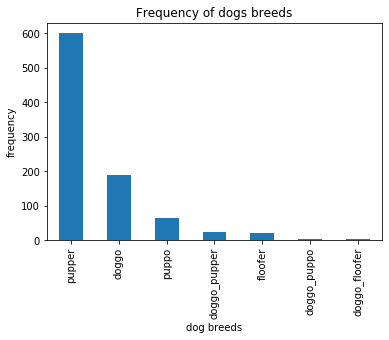

In [140]:
ax=df_final.dog_breed.value_counts().plot(kind='bar',title="Frequency of dogs breeds");
ax.set_xlabel("dog breeds");
ax.set_ylabel("frequency");

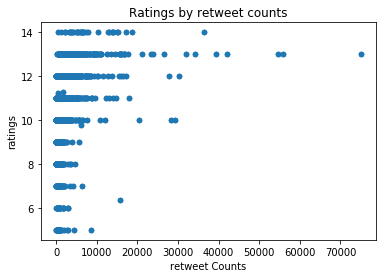

In [141]:

df_final.plot(x='retweets_count', y='rating', kind='scatter')
plt.xlabel('retweet Counts')
plt.ylabel('ratings')
plt.title(label="Ratings by retweet counts")
fig = plt.gcf()


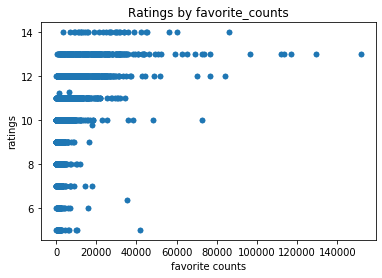

In [142]:
df_final.plot(x='favorite_count', y='rating', kind='scatter')
plt.xlabel('favorite counts')
plt.ylabel('ratings')
plt.title(label="Ratings by favorite_counts")
fig = plt.gcf()


In [128]:
B=(df_final.query('dog_breed == "pupper"')).favorite_count.sum()/(df_final.query('dog_breed == "pupper"')).count()["tweet_id"]
C=(df_final.query('dog_breed == "floofer"')).favorite_count.sum()/(df_final.query('dog_breed == "floofer"')).count()["tweet_id"]
D=(df_final.query('dog_breed == "doggo"')).favorite_count.sum()/(df_final.query('dog_breed == "doggo"')).count()["tweet_id"]
E=(df_final.query('dog_breed == "doggo_pupper"')).favorite_count.sum()/(df_final.query('dog_breed == "doggo_pupper"')).count()["tweet_id"]
F=(df_final.query('dog_breed == "puppo"')).favorite_count.sum()/(df_final.query('dog_breed == "puppo"')).count()["tweet_id"]
G=(df_final.query('dog_breed == "doggo_floofer"')).favorite_count.sum()/(df_final.query('dog_breed == "doggo_floofer"')).count()["tweet_id"]
A=(df_final.query('dog_breed == "doggo_puppo"')).favorite_count.sum()/(df_final.query('dog_breed == "doggo_puppo"')).count()["tweet_id"]

print([B,C,D,E,F,G,A])

[6534.72, 11711.42857142857, 18063.920634920636, 13259.5, 20380.136363636364, 15452.0, 43419.0]


In [129]:
df_final.query('dog_breed == "pupper"').count().tweet_id

600

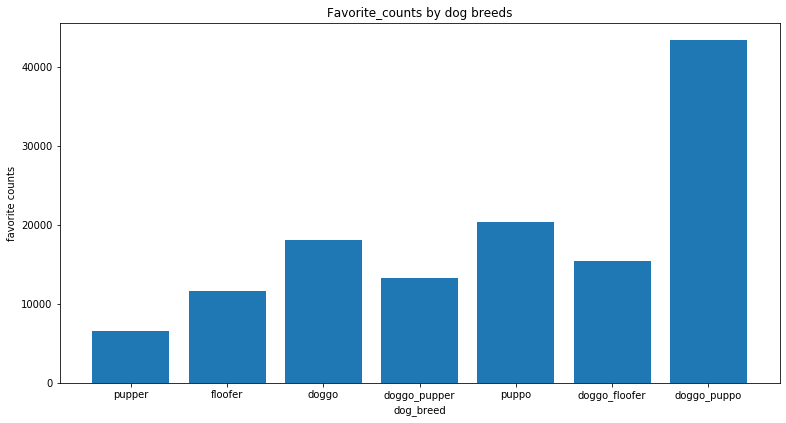

In [146]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
langs = ['pupper', 'floofer', 'doggo', 'doggo_pupper', 'puppo',
       'doggo_floofer', 'doggo_puppo']
students = [B,C,D,E,F,G,A]
ax.bar(langs,students)
ax.set_ylabel('favorite counts')
ax.set_xlabel('dog_breed')
ax.set_title("Favorite_counts by dog breeds")
plt.show()

In [147]:
b=(df_final.query('dog_breed == "pupper"')).rating.sum()/(df_final.query('dog_breed == "pupper"')).count()["tweet_id"]
c=(df_final.query('dog_breed == "floofer"')).rating.sum()/(df_final.query('dog_breed == "floofer"')).count()["tweet_id"]
d=(df_final.query('dog_breed == "doggo"')).rating.sum()/(df_final.query('dog_breed == "doggo"')).count()["tweet_id"]
e=(df_final.query('dog_breed == "doggo_pupper"')).rating.sum()/(df_final.query('dog_breed == "doggo_pupper"')).count()["tweet_id"]
f=(df_final.query('dog_breed == "puppo"')).rating.sum()/(df_final.query('dog_breed == "puppo"')).count()["tweet_id"]
g=(df_final.query('dog_breed == "doggo_floofer"')).rating.sum()/(df_final.query('dog_breed == "doggo_floofer"')).count()["tweet_id"]
a=(df_final.query('dog_breed == "doggo_puppo"')).rating.sum()/(df_final.query('dog_breed == "doggo_puppo"')).count()["tweet_id"]

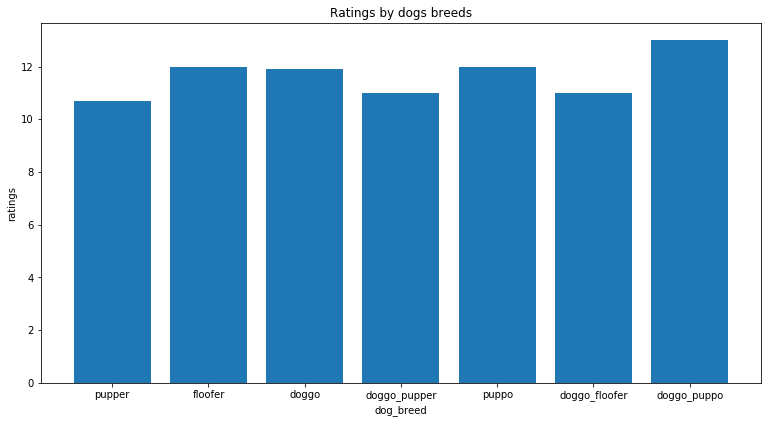

In [148]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
langs = ['pupper', 'floofer', 'doggo', 'doggo_pupper', 'puppo',
       'doggo_floofer', 'doggo_puppo']
students = [b,c,d,e,f,g,a]
ax.bar(langs,students)
ax.set_ylabel('ratings')
ax.set_xlabel('dog_breed')
ax.set_title('Ratings by dogs breeds')
plt.show()

In [ ]:
#checks on visualization
df_final[df_final['dog_breed'] == "doggo_puppo"]["rating"].mean()

In [ ]:
df_final[df_final['dog_breed'] == "doggo"]["rating"].mean()

In [ ]:
df_final['rating_numerator'].value_counts()